# Preventive measure analysis

In [1]:
import matplotlib.pyplot as plt
from matplotlib import ticker as mticker
from matplotlib.patches import Patch
import matplotlib.gridspec as gridspec

from os.path import join
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
stype_names = {'primary':'primary', 'primary_dc':'primary\nwith daycare',
               'lower_secondary':'lower secondary',
               'lower_secondary_dc':'lower secondary\nwith daycare',
               'upper_secondary':'upper secondary', 'secondary':'secondary'}

In [3]:
src_path = '../../../data/intervention_measures_delta/simulation_results'
res_path = '../../../plots/intervention_measures/delta'

## Individual measures

In [4]:
def annotate(ax, data, order, offset):
    for i, measure in enumerate(order):
        scenario_student = data[(data['measure'] == measure) &\
                                (data['index_case'] == 'student')]
        scenario_teacher = data[(data['measure'] == measure) &\
                                (data['index_case'] == 'teacher')]
        
        avg_R_student = scenario_student['R0'].mean()
        #std_R_student = scenario_student['R0'].std()
        avg_R_teacher = scenario_teacher['R0'].mean()
        #std_R_teacher = scenario_teacher['R0'].std()
        
        ax.text(3.2 + offset, i - 0.15, '${:1.1f}$'\
                .format(avg_R_teacher), fontsize=8)
        ax.text(3.2 + offset, i + 0.2, '${:1.1f}$'\
                .format(avg_R_student), fontsize=8)

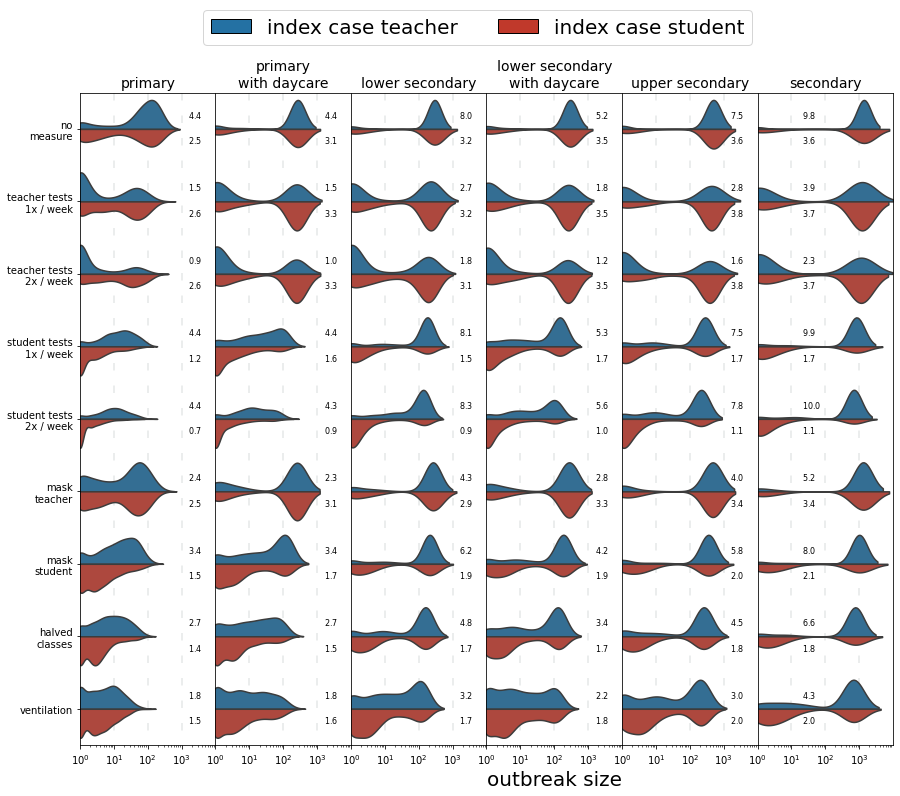

In [5]:
fig, axes = plt.subplots(figsize=(17, 12))
gs1 = gridspec.GridSpec(1, 7)
gs1.update(wspace=0, hspace=0) # set the spacing between axes. 
axes =  [plt.subplot(gs1[i]) for i in range(6)]

order = ['no\nmeasure', 'teacher tests\n1x / week', 'teacher tests\n2x / week', 
         'student tests\n1x / week', 'student tests\n2x / week',
        'mask\nteacher', 'mask\nstudent', 'halved\nclasses', 'ventilation']
stypes = ['primary', 'primary_dc', 'lower_secondary', 'lower_secondary_dc',
          'upper_secondary', 'secondary']

for i, stype, offset in zip(range(len(stypes)), stypes, [0, 0, 0, 0, 0, -1.9]):
    data = pd.read_csv(join(src_path, '{}_combined_ensembles.csv'.format(stype)),
                      low_memory=False)
    data['infected_agents'] = np.log10(data['infected_agents'])
    sns.violinplot(x="infected_agents", y="measure", hue="index_case",
                   data=data, palette=['#2471A3', '#C0392B'], split=True, 
                   ax=axes[i], order=order, inner=None, hue_order=['teacher', 'student'])
    annotate(axes[i], data, order, offset)
    
xlims = [9999] * 6
xlims = np.log10(xlims)
for i, ax, xlim, stype in zip(range(len(axes)), axes, xlims, stypes):
    if i != 0:
        axes[i].set_yticks([])
    ax.get_legend().set_visible(False)    
    ax.set_ylabel('')
    if i != 3:
        ax.set_xlabel('')
    else:
        ax.set_xlabel('outbreak size', fontsize=20)
    ax.set_title(stype_names[stype], fontsize=14)

ymax = 8.5
ymin = -0.5
for ax, xlim in zip(axes, xlims):
    for xpos in [1, 2, 3]:
        ax.plot([xpos, xpos], [ymin, ymax],  linestyle='--', dashes=(5, 10),
            color='#E5E8E8', zorder=0)

    ax.set_ylim(ymax, ymin)
    ax.xaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
    xticks = [np.log10(x) for p in np.arange(0, xlim) for\
                        x in np.linspace(10**p, 10**(p+1), 10)]
    ax.xaxis.set_ticks(xticks, minor=True)
    ax.set_xlim(0, xlim)

#ax.legend()
legend_ax = fig.add_axes([0.3, 0.93, 0.3, 0.05])
legend_elements = [Patch(facecolor='#2471A3', edgecolor='k',
                         label='index case teacher'),
                   Patch(facecolor='#C0392B', edgecolor='k',
                         label='index case student')]
leg = legend_ax.legend(handles=legend_elements, loc='center', ncol=2, fontsize=20)
legend_ax.set_axis_off()

plt.savefig(join(res_path, 'individual_measures.pdf'))
plt.savefig(join(res_path, 'individual_measures.svg'))

## Measure packages

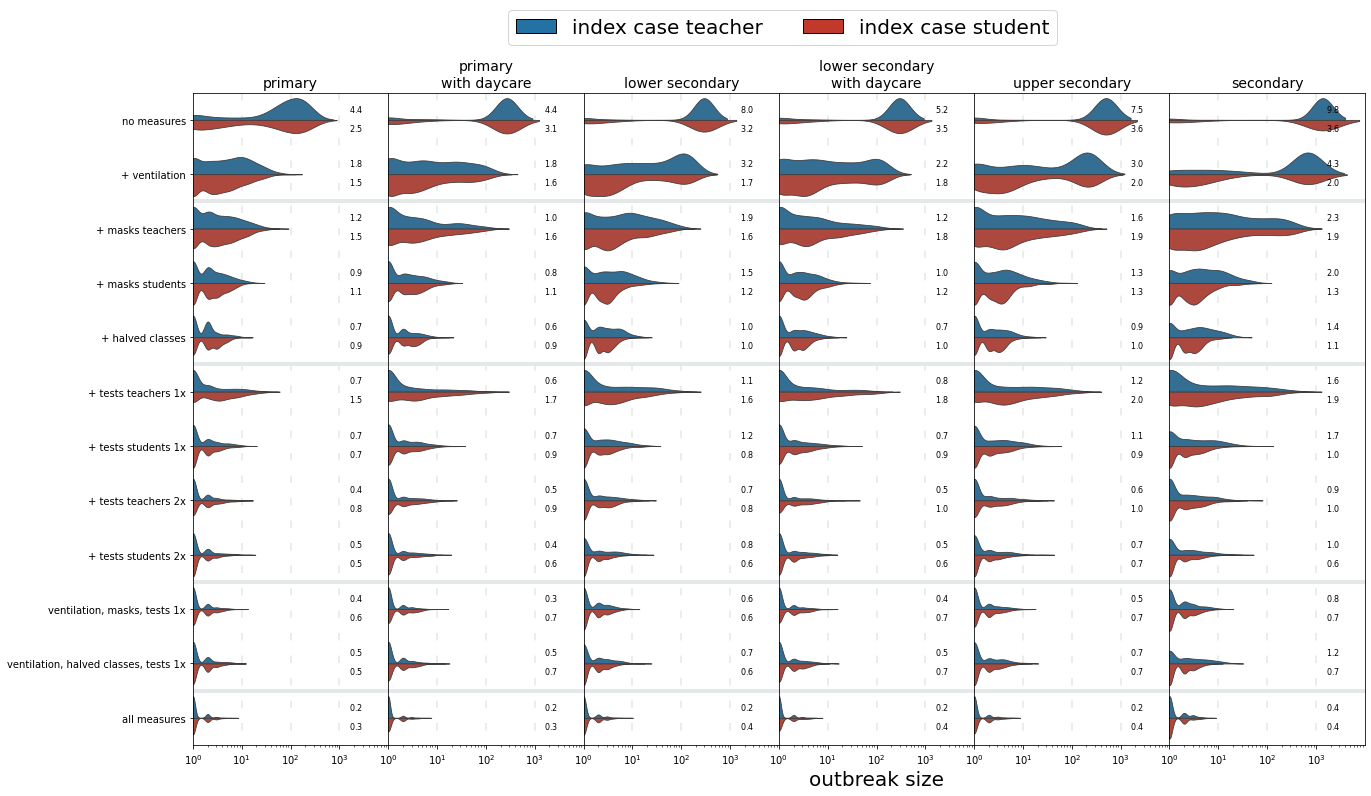

In [6]:
fig, axes = plt.subplots(figsize=(21, 12))
gs1 = gridspec.GridSpec(1, 6)
gs1.update(wspace=0, hspace=0) # set the spacing between axes. 
axes =  [plt.subplot(gs1[i]) for i in range(6)]

order = ['no\nmeasure', 
         'ventilation',
         'ventilation + mask teachers',
         'ventilation + mask teachers + mask students',
         'ventilation + mask teachers + mask students + halved classes',
         'ventilation + tests teachers 1x',
         'ventilation + tests teachers 1x + tests students 1x',
         'ventilation + tests teachers 2x + tests students 1x',
         'ventilation + tests teachers 2x + tests students 2x',
         'ventilation + masks teachers & students + tests 1x teachers & students',
         'ventilation + halved classes + tests 1x teachers & students',
         'all measures'
        ]
ylabels = ['no measures', '+ ventilation', '+ masks teachers', '+ masks students',
           '+ halved classes', '+ tests teachers 1x', '+ tests students 1x',
           '+ tests teachers 2x', '+ tests students 2x',
           'ventilation, masks, tests 1x', 'ventilation, halved classes, tests 1x',
           'all measures']

stypes = ['primary', 'primary_dc', 'lower_secondary', 'lower_secondary_dc',
          'upper_secondary', 'secondary']


for i, stype in enumerate(stypes):
    data = pd.read_csv(join(src_path, '{}_combined_ensembles.csv'.format(stype)),
                      low_memory=False)
    data['infected_agents'] = np.log10(data['infected_agents'])
    sns.violinplot(x="infected_agents", y="measure", hue="index_case",
                   data=data, palette=['#2471A3', '#C0392B'], split=True, 
                   ax=axes[i], order=order, inner=None, linewidth=0.8, 
                   hue_order=['teacher', 'student'])
    annotate(axes[i], data, order, 0)
    
xlims = [9999] * 6
xlims = np.log10(xlims)
for i, ax, xlim, stype in zip(range(len(axes)), axes, xlims, stypes):
    if i != 0:
        axes[i].set_yticks([])
    ax.get_legend().set_visible(False)    
    ax.set_ylabel('')
    if i != 3:
        ax.set_xlabel('')
    else:
        ax.set_xlabel('outbreak size', fontsize=20)
    ax.set_title(stype_names[stype], fontsize=14)
    
    if i == 0:
        ax.set_yticklabels(ylabels)  

ymax = 11.5
ymin = -0.5
for ax, xlim in zip(axes, xlims):
    for ypos in [1.5, 4.5, 8.5, 10.5]:
        ax.plot([0, xlim], [ypos, ypos], color='#E5E8E8', lw=4)
    for xpos in [1, 2, 3]:
        ax.plot([xpos, xpos], [ymin, ymax],  linestyle='--', dashes=(5, 10),
            color='#E5E8E8', zorder=0)
        
    ax.set_ylim(ymax, ymin)
    ax.xaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
    xticks = [np.log10(x) for p in np.arange(0, xlim) for\
                        x in np.linspace(10**p, 10**(p+1), 10)]
    ax.xaxis.set_ticks(xticks, minor=True)
    ax.set_xlim(0, xlim)

legend_ax = fig.add_axes([0.365, 0.93, 0.3, 0.05])
legend_elements = [Patch(facecolor='#2471A3', edgecolor='k',
                         label='index case teacher'),
                   Patch(facecolor='#C0392B', edgecolor='k',
                         label='index case student')]
leg = legend_ax.legend(handles=legend_elements, loc='center', ncol=2, fontsize=20)
legend_ax.set_axis_off()

#fig.tight_layout()
plt.savefig(join(res_path, 'measure_packages.pdf'), bbox_extra_artists=[leg])
plt.savefig(join(res_path, 'measure_packages.svg'), bbox_extra_artists=[leg])